In [44]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
# import plots

In [28]:
wind = xr.open_dataset('ERA5winds.nc') 

time_wind = wind['valid_time'].values
start = np.datetime64("2023-04-07")
end = np.datetime64("2023-07-09")

wind = wind.where((wind.valid_time >= start) & (wind.valid_time <= end), drop=True)

In [29]:
omega = 7.2921*1e-5
rho_air = 1.3            
rho_water = 1030         
Cd = 1.3e-3                
phi = np.radians(wind.latitude)
f0 = 2*omega*np.sin(phi)

In [30]:
#wind stress N/m^2
tau_x = rho_air * Cd * (wind.u10**2)
tau_y = rho_air * Cd * (wind.v10**2)

u_ek = tau_y / (rho_water * f0)   # eastward 
v_ek = -tau_x / (rho_water * f0)  # northward 
M_ek = np.sqrt(u_ek**2 + v_ek**2)

taux_mean = tau_x.mean(dim=['latitude', 'longitude'], skipna=True) 
u_ek_mean = u_ek.mean(dim=['latitude', 'longitude'], skipna=True) 
v_ek_mean = v_ek.mean(dim=['latitude', 'longitude'], skipna=True) 
M_ek_mean = M_ek.mean(dim=['latitude', 'longitude'], skipna=True) 

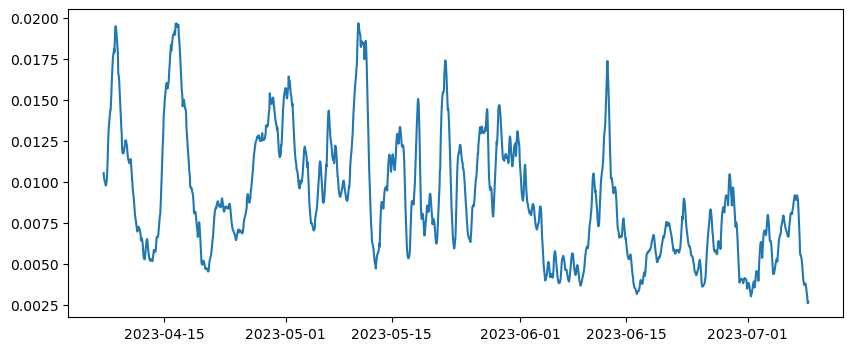

In [31]:
plt.figure(figsize=(10, 4))
plt.plot(wind.valid_time, u_ek_mean/40);

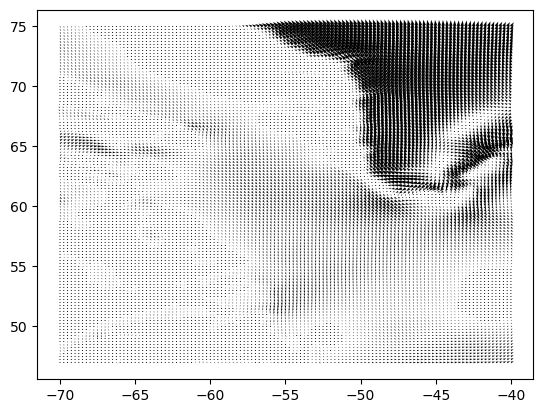

In [36]:
plt.quiver(wind.longitude, wind.latitude, wind.u10.mean(dim=['valid_time'], skipna=True) , wind.v10.mean(dim=['valid_time'], skipna=True))